# Homework 6 [20pt]
## Introduction to Data Science
### Spring 2023

In this assignment, you will analyze the Baltimore crime data collected by Baltimore Police Department using clustering method. You will apply the K-Means algorithm from scratch, train the model on the train
dataset, evaluate your model using validation dataset, and visualize the clustering results on your test dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("BPD_2012_2017.csv")
print(len(df))

# Drop missing values
df = df.dropna(subset=['Longitude', 'Latitude'])

# Show first 3 rows
df.head(3)

276529


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1


In [3]:
# Select two features from dataframe as dataset 
X = df[['Longitude', 'Latitude']].to_numpy()

print(X.shape)

(274325, 2)



where variable $X$ is the whole dataset we will use for clustering

### Problem 1 Train-Validation-Test Split [3pt]

Use function `train_test_split` in module `sklearn.model_selection` with a `random_state` of `3407` to split the whole dataset $X$ into train, validation and test dataset, with ratio 0.6, 0.2, 0.2.

FYI: To verify your code correctness, the shape of your train, validation and test dataset should exactly be as follows:

- shape of train dataset: (164595, 2)
- shape of validation dataset: (54865, 2)
- shape of test dataset: (54865, 2)

Comment: Usually we don't do train-validation-test split in unsupervised learning. This is just for coding practice.

In [4]:
from sklearn.model_selection import train_test_split

random_state = 3407
X_train, X_test = train_test_split( X,
                                    test_size=0.2,
                                    train_size=0.8,
                                    random_state=random_state,
                                    shuffle=True,
                                    stratify=None
                                   )
X_train, X_valid = train_test_split( X_train,
                                    test_size=0.25,
                                    train_size=0.75,
                                    random_state=random_state,
                                    shuffle=True,
                                    stratify=None
                                   ) #  0.75 * 0.8 = 0.6

In [5]:
X_train.shape, X_test.shape, X_valid.shape

((164595, 2), (54865, 2), (54865, 2))

### Problem 2 K-Means Fitting and Model Evaluation

Follow the instruction below and finish the three tasks in this problem 

1. Write a function computing the validation inertias, given the trained K-Means Model and the validation dataset. [3pt]


2. Fit KMeans clusters to the training set for K in [2, 14] using a `random_state` of `3407`. [5pt]


3. Plot the training inertias as a function of K. In a separate figure, plot the validation inertias as a function of K, where validation inertias should be obtained by the function in step 1. [2pt]

In [6]:
def validation(kmeans, X_val):
    '''
    Input: kmeans - your trained K-Means model using sklearn.cluster.KMeans
            X_val - validation dataset
            
    Output: validation inertias
    '''
    preds = kmeans.fit_predict(X_val)
    K = np.max(preds) + 1
    print(f"K is {K}")
    iner = np.sum([np.sum(np.sum((X_valid[preds == i] - kmeans.cluster_centers_[i])**2, axis=1)) for i in
        range(0,K)])
    print(iner)
    return iner

In [7]:
from sklearn.cluster import KMeans

inertias = []
for k in range(2,15):
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X_train)
    inertias.append(validation(model, X_valid))

K is 2
78.99244997556735
K is 3
54.66806765259908
K is 4
42.699985996752275
K is 5
35.317731004442415
K is 6
28.042457977440915
K is 7
22.72184467473326
K is 8
19.57639976228317
K is 9
17.348384973500607
K is 10
15.467501594354855
K is 11
13.831459458252922
K is 12
12.603210771825575
K is 13
11.570887811855394
K is 14
10.664998117729654


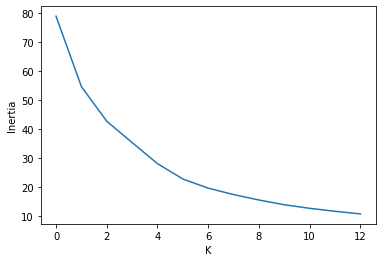

In [8]:
plt.figure()
plt.plot(inertias)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

Based on validation plot, is there a clear "elbow" in the plot?  If so, choose the K value using the elbow method. If not, propose an alternative quantitative method, and specify the K value chosen by your method. Provide a detailed explanation. [2pt]

***Your answer:***
There was not a clear evidence or breakpoint in the inertia plot. By visually assessing the
inertia plot, as we are increasing the # of clusters (k) we can't see any point that shows a
convergence for inetria. So for a better assessment, I will use the silhouette method for this purpose.

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Based on this plot (shown bellow), we can conclude that the number K=8,9 are the best, because we reach an almost stable value for the sil. index after this #.

In [9]:
from sklearn.metrics import silhouette_score

silhouette_avgs = []
for k in range(2,15):
    clusterer = KMeans(n_clusters=k, random_state=random_state)
    cluster_labels = clusterer.fit_predict(X_valid)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_valid, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.4029347546623477
For n_clusters = 3 The average silhouette_score is : 0.3591209993207003
For n_clusters = 4 The average silhouette_score is : 0.3581527408006087
For n_clusters = 5 The average silhouette_score is : 0.34917124580452547
For n_clusters = 6 The average silhouette_score is : 0.37513718393596895
For n_clusters = 7 The average silhouette_score is : 0.393864595535821
For n_clusters = 8 The average silhouette_score is : 0.38658647187822864
For n_clusters = 9 The average silhouette_score is : 0.3908871121720532
For n_clusters = 10 The average silhouette_score is : 0.39774411096572226
For n_clusters = 11 The average silhouette_score is : 0.39986490820171383
For n_clusters = 12 The average silhouette_score is : 0.4049916266319984
For n_clusters = 13 The average silhouette_score is : 0.39382900688029937
For n_clusters = 14 The average silhouette_score is : 0.395625289059326


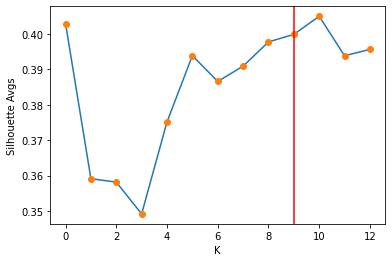

In [10]:
plt.figure()
plt.plot(silhouette_avgs)
plt.plot(silhouette_avgs,'o')
plt.xlabel("K")
plt.ylabel("Silhouette Avgs")
plt.axvline(9,c='r')
plt.show()

### Problem 3 Result Visualization


Train your model with the selected number of clusters in problem 2 and  plot the cluster assignments on the test dataset using the *plot_clusters* function. [3pt]

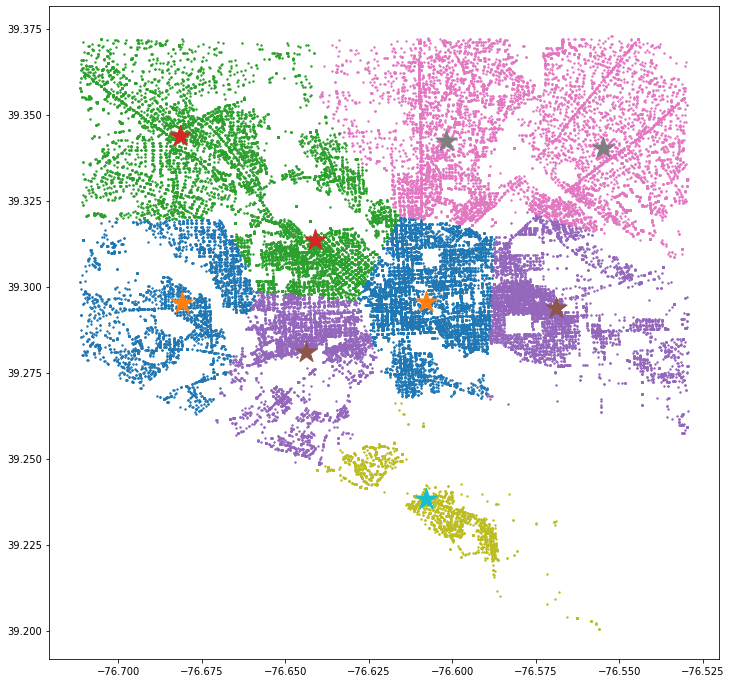

In [11]:
def plot_clusters(kmeans, X_test):
    '''
    Input: kmeans - your trained K-Means model using sklearn.cluster.KMeans
            X_val - test dataset  
    *** DO NOT MODIFY THIS CODE BLOCK ***
    '''
    test_labels = kmeans.predict(X_test)
    plt.figure(figsize=(12,12))
    for i in range(np.max(test_labels)+1):
        plt.scatter(X_test[test_labels == i, 0] , X_test[test_labels == i, 1] , s=2, label = i)
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i, 1], label=i, s=500, marker="*")
    plt.show()

K = 9
model = KMeans(n_clusters=K, random_state=random_state)
model.fit(X_train)

plot_clusters(model, X_test)

[2pt] Do these clusters show a different pattern than what you would expect from uniformly distributed locations? Optionally, you can repeat your evaluation on the pseudo-random uniformly distributed longitudes and lattitudes below to support your answer. But a verbal explanation of your analysis and prediction is also fine. 

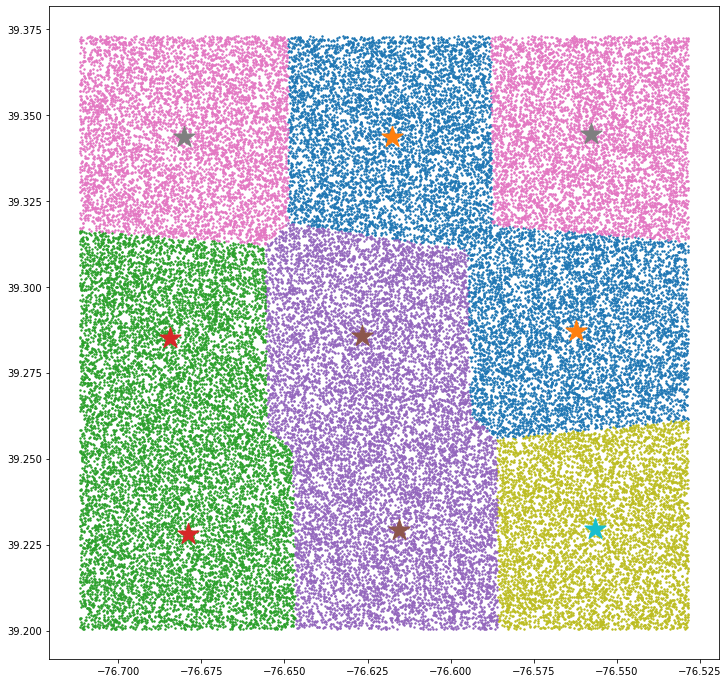

In [12]:
min_longitude = X[:,0].min()
max_longitude = X[:,0].max()
min_latitude = X[:,1].min()
max_latitude = X[:,1].max()

X_uniform = np.random.uniform(low=[min_longitude, min_latitude], high=[max_longitude, max_latitude], size=(X.shape[0],2))
X_uniform_train, X_uniform_test = train_test_split(X_uniform, test_size=0.2, random_state=random_state)

K = 9
model = KMeans(n_clusters=K, random_state=random_state)
model.fit(X_uniform_train)

plot_clusters(model, X_uniform_test)

# It is evident that our pattern is not very distinct from an uniform distribution. The
# made clutsters are well seperated and it reflect the uniform distribution that we were expecting.